Querying..
Data acquired
InChI=1S/C10H6ClN3O3/c11-7-3-9(6-12-4-7)17-10-2-1-8(5-13-10)14(15)16/h1-6H
Correlation cut-off: 0.0


[14:25:14] Unusual charge on atom 3 number of radical electrons set to zero
[14:25:15] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number, Number; Mobile-H groups: One instead of multiple, Attachment points, Number; Charge(s): Do not match; Proton balance: Does not match)



InChI=1S/C10H6ClN3O3/c11-7-3-9(6-12-4-7)17-10-2-1-8(5-13-10)14(15)16/h1-6H
Number of 0s in 'tanimoto_score' column: 22
Number of NaNs in 'tanimoto_score' column: 0
3 100
     ISOMAP Feature 1  ISOMAP Feature 2  ISOMAP Feature 3
0          134.128282        -96.396170         -0.415550
1            4.917386         -0.463419          1.005766
2            3.726121         -1.039763         -2.081679
3           11.050770        -14.534474          0.314210
4          -16.393177          1.482626         -9.736351
..                ...               ...               ...
995         -4.569883         10.122956          2.013060
996         -0.282925          5.574201         -4.164470
997         -0.184039          1.439266         -6.165451
998          3.026580         -0.336253         -1.407463
999         -7.567262         10.937568         -8.428313

[1000 rows x 3 columns]
Starting
Cosine is selected
            PC1        PC2        PC3
0    115.040627 -98.328795  12.703245
1    

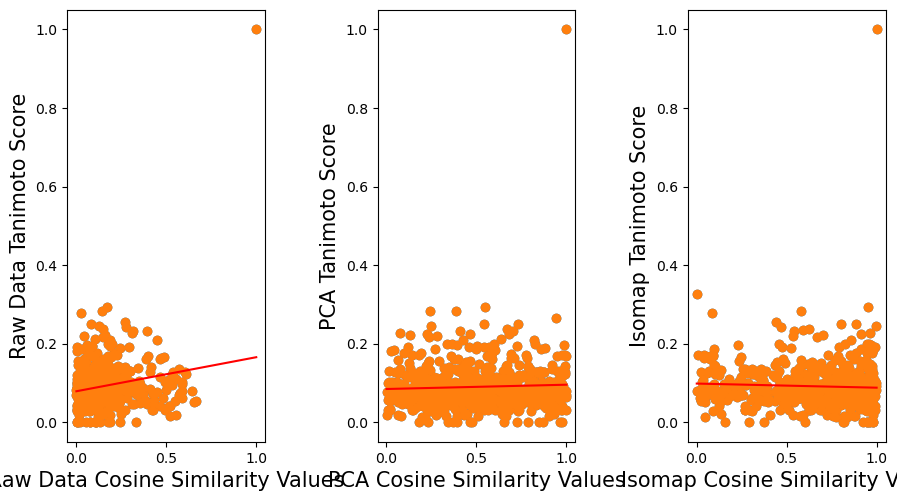

('Overlapping Phenosimilars',)
This is Overlapping Phenosimilars
This is Overlapping Phenosimilars
User Selections:  {'UserQuery': 'InChI=1S/C10H6ClN3O3/c11-7-3-9(6-12-4-7)17-10-2-1-8(5-13-10)14(15)16/h1-6H', 'UserCorrelationCutOff': 0.0, 'DimReduction(1)': 'Isomap', 'CorrelationMethod': 'Cosine Similarity', 'DimReduction(2)': 'PCA'}


C:\Users\abbyk\Streamlit\ranked_top_1000.csv

In [ ]:

#for the prototype

import pandas as pd
import os
import pyarrow.parquet as pq
import sys
from scipy.stats import pearsonr, spearmanr
from scipy.spatial.distance import cosine
from scipy import stats
import array
import io
from sklearn.datasets import make_classification
from feature_engine.selection import DropCorrelatedFeatures
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
import numpy as np
import requests
from io import BytesIO
from sklearn.manifold import TSNE
from ttkthemes import ThemedTk
from umap import UMAP
from IPython.display import FileLink
from tkinter import filedialog
from urllib.request import urlretrieve
import shutil
import webbrowser


#for the GUI

import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model
from functools import partial


from tkinter import * #imports all functions for the tkinter module
import tkinter as tk
from tkinter import ttk
import tkinter.messagebox
from tkinter import messagebox
import customtkinter
import subprocess
import tksheet
from urllib.request import urlopen
from PIL import Image, ImageTk
from tkinter import simpledialog


from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import TanimotoSimilarity

customtkinter.set_appearance_mode("System")  # Modes: "System" (standard), "Dark", "Light"
customtkinter.set_default_color_theme("green")  # Themes: "blue" (standard), "green", "dark-blue"

class App(customtkinter.CTk):
    def __init__(self):
        super().__init__()
        # Set default values 
        self.corr = 0.0 
        self.isomap_comps =3
        self.isomap2_comps =3
        self.isomap_neigh = 100
        self.isomap2_neigh = 100
        self.pca_components = 3
        self.pca2_components = 3
        self.pca3_components = 3
        self.pca4_components = 3
        self.umap_components = 3
        self.umap2_components = 3
        self.umap_neigh = 5
        self.umap2_neigh = 5
        self.umap_dist = 0.1
        self.umap2_dist = 0.1
        self.tsne_components = 3
        self.tsne2_components = 3
        self.tsne_perplex = 30.
        self.tsne2_perplex = 30.0
        self.tsne_iter = 1000
        self.tsne2_iter = 1000
        self.query = ""

        # Set the window geometry
        # Initialize screen width and height
        self.geometry(f"{1100}x{580}")
        self.screen_width = self.winfo_screenwidth()
        self.screen_height = self.winfo_screenheight()
        self.title("Phenomics GUI")
        self.bind("<Configure>", self.on_configure)

        # configure grid layout (3 rows, 4 columns)
        self.grid_rowconfigure(0, weight = 0) 
        self.grid_rowconfigure(1, weight = 0)
        self.grid_rowconfigure(2, weight = 1)
        self.grid_rowconfigure(3, weight = 0)
        self.grid_rowconfigure(4, weight =0)
        self.grid_columnconfigure(0, weight = 0)
        self.grid_columnconfigure(1, weight =1)
        self.grid_columnconfigure(2,weight =0)
        self.grid_columnconfigure(3, weight =0)
        
        self.sidebar_frame = customtkinter.CTkFrame(self, corner_radius=0)
        self.sidebar_frame.grid(row=0, column=0, rowspan=4, sticky="nsew")
        
        self.radiobutton_frame = customtkinter.CTkScrollableFrame(self, label_text="Correlation Methods")
        self.radiobutton_frame.grid(row=0, rowspan =2,column=3, padx=(20, 20), pady=(20,0), sticky="nsew")
        
        self.scrollable_frame = customtkinter.CTkScrollableFrame(self, label_text="Cellular Component Selection")
        self.scrollable_frame.grid(row=1, column=2,padx=(20, 0), pady=(10, 0),rowspan = 2,sticky="nsew")
        self.scrollable_frame.grid_columnconfigure(0, weight=1)
        
        self.checkbox_slider_frame = customtkinter.CTkScrollableFrame(self, label_text="Dimensionality Reduction Techniques")
        self.checkbox_slider_frame.grid(row=2, column=3, padx=(20, 20), pady=(10, 0), rowspan=1, sticky="nsew")
        
        self.tabview = customtkinter.CTkTabview(self)
        self.tabview.grid(row=1, column=1, padx=(20,0), pady=(0,0), rowspan=2, sticky="nsew")
        
        # create main entry and button
        self.entry = customtkinter.CTkEntry(self, placeholder_text="Enter your query here:")
        self.entry.grid(row=3, column=1, columnspan=2, padx=(20, 0), pady=(20, 20), sticky="nsew")

        self.main_button_1 = customtkinter.CTkButton(master=self, fg_color="transparent", border_width=2, text_color=("gray10", "#DCE4EE"), text="Let's Query!", command=self.query_button_click)
        self.main_button_1.grid(row=3, column=3, padx=(20, 20), pady=(20, 20), sticky="nsew")
        self.progress = customtkinter.CTkProgressBar(master=self, orientation="horizontal",border_width=0)
        self.progress.grid(row=3, column=3, padx=(10, 10), pady=(5, 5), sticky="s")

        # create textbox
        self.textbox = customtkinter.CTkTextbox(self, height = 10, wrap="word")
        self.textbox.grid(row=0, column=1, columnspan=2, padx=(20, 0), pady=(20, 0), sticky="nsew")
        
        
        # create sidebar frame with widgets
        self.sidebar_frame.grid_rowconfigure((0,1,4,5,6,7), weight=0)
        self.sidebar_frame.grid_rowconfigure((2,3), weight=1)
        self.sidebar_frame.grid_columnconfigure(0, weight=1)
        self.logo_label = customtkinter.CTkLabel(self.sidebar_frame, text="Phenomics", font=customtkinter.CTkFont(size=35, weight="bold"))
        self.logo_label.grid(row=0, column=0, pady=(20, 10), sticky = "nsew")
        self.appearance_mode_label = customtkinter.CTkLabel(self.sidebar_frame, text="Appearance Mode:", anchor="w")
        self.appearance_mode_label.grid(row=4, column=0, padx=25, pady=(5, 0), sticky ='nsew')
        self.appearance_mode_optionemenu = customtkinter.CTkOptionMenu(self.sidebar_frame, values=["Light", "Dark", "System"],command=self.change_appearance_mode_event)
        self.appearance_mode_optionemenu.grid(row=5, column=0, padx=20, pady=(5, 5), sticky = 'nsew')
        self.scaling_label = customtkinter.CTkLabel(self.sidebar_frame, text="UI Scaling:", anchor="w")
        self.scaling_label.grid(row=6, column=0, padx=25, pady=(5, 0), sticky = 'nsew')
        self.scaling_optionemenu = customtkinter.CTkOptionMenu(self.sidebar_frame, values=["80%", "90%", "100%", "105%", "110%", "120%"],command=self.change_scaling_event)
        self.scaling_optionemenu.grid(row=7, column=0, padx=20, pady=(5, 5), sticky = 'nsew')

        #title image 
        imgURL = 'https://jump-cellpainting.broadinstitute.org/files/styles/original/public/jump-cp/files/jump_logo.png?itok=eZnHKOl2'
        response = requests.get(imgURL)
        img_data = response.content
        titleimage = Image.open(BytesIO(img_data))
        crop_box = (0, 125, 1275, 775)
        titleimage = titleimage.crop(crop_box)
        #img_height = 493.7142857142857 #(self.screen_height/1.75)# 650 / 3
        img_height = self.winfo_screenheight()/1.8
        #img_width =  219.42857142857142 #(self.screen_width/7) #1275 / 3
        img_width = self.winfo_screenwidth()/7
        titleimage = titleimage.rotate(270, expand=True, fillcolor="red")
        titleimage = customtkinter.CTkImage(titleimage, size=(img_width,img_height))
        self.display_image = customtkinter.CTkLabel(master=self.sidebar_frame, bg_color= "transparent", text=None, image=titleimage)
        self.display_image.grid(row=1, rowspan = 2, column=0, columnspan=1, pady=(20,10), padx=0, sticky="n")  
        

        # create radiobutton frame
        #self.radiobutton_frame.grid_rowconfigure((0,1,2,3,4), weight = 1)
        #self.radiobutton_frame.grid_columnconfigure(1, weight =1)
        self.radio_var = tkinter.IntVar(value=-1)
        self.radiobutton_frame.grid_columnconfigure(0,weight =1)
        self.radio_button_1 = customtkinter.CTkRadioButton(master=self.radiobutton_frame, variable=self.radio_var, value=0)
        self.radio_button_1.grid(row=1, column=0, pady=(30, 0), padx=20, sticky="w")
        self.radio_button_2 = customtkinter.CTkRadioButton(master=self.radiobutton_frame, variable=self.radio_var, value=1)
        self.radio_button_2.grid(row=2, column=0, pady=(30, 0), padx=20, sticky="w")
        self.radio_button_3 = customtkinter.CTkRadioButton(master=self.radiobutton_frame, variable=self.radio_var, value=2)
        self.radio_button_3.grid(row=3, column=0, pady=(30, 0), padx=20, sticky="w")
        self.radio_button_1.configure(text="Pearson Correlation")
        self.radio_button_2.configure(text="Spearman Correlation")
        self.radio_button_3.configure(text="Cosine Similarity")
        self.string_input_button = customtkinter.CTkButton(master=self.radiobutton_frame, text="Edit Correlation Cut-Off ", command=self.open_input_dialog_event)
        self.string_input_button.grid(row=0, column=0, pady=(0,0), padx =(30,20), sticky="nsew")
        
        # Add help (?) button for correlation methods
        self.help_button_correlation = customtkinter.CTkButton(master=self.radiobutton_frame, text="?")
        self.help_button_correlation.grid(row=4,column =0, pady = (0,0),sticky="se")
        self.help_button_correlation.configure(command=self.show_description_popup_correlation,width=0.25, height=1, border_width=0,corner_radius=9,fg_color="dark grey",hover=True,hover_color="grey", border_color="black")
        
        # create slider and progressbar frame
        #self.slider_progressbar_frame = customtkinter.CTkFrame(self, fg_color="transparent")
        #self.slider_progressbar_frame.grid(row=0, column=1, padx=(20, 0), pady=(150, 0), sticky="nsew")
        #self.slider_progressbar_frame.grid_columnconfigure(0, weight=1)
        #self.slider_progressbar_frame.grid_rowconfigure(4, weight=1)

        # create scrollable frame

        self.scrollable_frame_switches = []
        switch1 = customtkinter.CTkSwitch(master=self.scrollable_frame, text="Mitochondria",variable=tk.IntVar(value=1), onvalue=1, offvalue=0)
        switch1.grid(row=0, column=0, padx=10, pady=(2, 5), sticky="w")
        self.scrollable_frame_switches.append(switch1)
        switch2 = customtkinter.CTkSwitch(master=self.scrollable_frame, text="Nucleus",variable=tk.IntVar(value=1), onvalue=1, offvalue=0)
        switch2.grid(row=1, column=0, padx=10, pady=(2, 5), sticky="w")
        self.scrollable_frame_switches.append(switch2)
        switch3 = customtkinter.CTkSwitch(master=self.scrollable_frame, text="Cytoplasm",variable=tk.IntVar(value=1), onvalue=1, offvalue=0)
        switch3.grid(row=2, column=0, padx=10, pady=(2, 5), sticky="w")
        self.scrollable_frame_switches.append(switch3)
        switch4 = customtkinter.CTkSwitch(master=self.scrollable_frame, text="Rough ER",variable=tk.IntVar(value=1), onvalue=1, offvalue=0)
        switch4.grid(row=3, column=0, padx=10, pady=(2, 5), sticky="w")
        self.scrollable_frame_switches.append(switch4)
        switch5 = customtkinter.CTkSwitch(master=self.scrollable_frame, text="AGP",variable=tk.IntVar(value=1), onvalue=1, offvalue=0)
        switch5.grid(row=4, column=0, padx=10, pady=(2, 5), sticky="w")
        self.scrollable_frame_switches.append(switch5)
        switch6 = customtkinter.CTkSwitch(master=self.scrollable_frame, text="DNA",variable=tk.IntVar(value=1), onvalue=1, offvalue=0)
        switch6.grid(row=5, column=0, padx=10, pady=(2, 5), sticky="w")
        self.scrollable_frame_switches.append(switch6)
        switch7 = customtkinter.CTkSwitch(master=self.scrollable_frame, text="RNA",variable=tk.IntVar(value=1), onvalue=1, offvalue=0)
        switch7.grid(row=6, column=0, padx=10, pady=(2, 5), sticky="w")
        self.scrollable_frame_switches.append(switch7)
        self.textbox2 = customtkinter.CTkLabel(master = self.scrollable_frame, text = "Component Characteristics", font=customtkinter.CTkFont(size=12))
        self.textbox2.grid(row = 7, column=0, padx=10, pady=(2, 5), sticky="w")
        
        
        #characteristics switches
        switch8 = customtkinter.CTkSwitch(master=self.scrollable_frame, text="Intensity", variable=tk.IntVar(value=1), onvalue=1, offvalue=0)
        switch8.grid(row=8, column=0, padx=10, pady=(10, 5), sticky="w")
        self.scrollable_frame_switches.append(switch8)
        switch9 = customtkinter.CTkSwitch(master=self.scrollable_frame, text="Shape",variable=tk.IntVar(value=1), onvalue=1, offvalue=0)
        switch9.grid(row=9, column=0, padx=10, pady=(2, 5), sticky="w")
        self.scrollable_frame_switches.append(switch9)
        switch10 = customtkinter.CTkSwitch(master=self.scrollable_frame, text="Size",variable=tk.IntVar(value=1), onvalue=1, offvalue=0)
        switch10.grid(row=10, column=0, padx=10, pady=(2, 5), sticky="w")
        self.scrollable_frame_switches.append(switch10)
        switch11 = customtkinter.CTkSwitch(master=self.scrollable_frame, text="Texture",variable=tk.IntVar(value=1), onvalue=1, offvalue=0)
        switch11.grid(row=11, column=0, padx=10, pady=(2, 5), sticky="w")
        self.scrollable_frame_switches.append(switch11)
        switch12 = customtkinter.CTkSwitch(master=self.scrollable_frame, text="Variation",variable=tk.IntVar(value=1), onvalue=1, offvalue=0)
        switch12.grid(row=12, column=0, padx=10, pady=(2, 5), sticky="w")
        self.scrollable_frame_switches.append(switch12)
        switch13 = customtkinter.CTkSwitch(master=self.scrollable_frame, text="Boundaries",variable=tk.IntVar(value=1), onvalue=1, offvalue=0)
        switch13.grid(row=13, column=0, padx=10, pady=(2, 5), sticky="w")
        self.scrollable_frame_switches.append(switch13)
        switch14 = customtkinter.CTkSwitch(master=self.scrollable_frame, text="Cell Distribution",variable=tk.IntVar(value=1), onvalue=1, offvalue=0)
        switch14.grid(row=14, column=0, padx=10, pady=(2, 5), sticky="w")
        self.scrollable_frame_switches.append(switch14)
       
         # Add help (?) button for components
        self.help_button_component = customtkinter.CTkButton(master=self.scrollable_frame, text="?")
        self.help_button_component.grid(row = 15, sticky = "se")
        self.help_button_component.configure(command=self.show_description_popup_component,width=0.25, height=1, border_width=0,corner_radius=9,fg_color="dark grey",hover=True,hover_color="grey", border_color="black")
               
        # create checkbox and switch frame
        self.radio_var_hyperpar = tkinter.IntVar(value=-1)
        self.checkbox_slider_frame.grid_columnconfigure(0, weight = 1)
        #self.checkbox_slider_frame.grid_columnconfigure(1, weight = 0)

        self.label_checkbox_slider = customtkinter.CTkLabel(master=self.checkbox_slider_frame)
        self.hyper_button = customtkinter.CTkButton(master=self.checkbox_slider_frame, text="Edit Hyperparameters")
        self.hyper_button.configure(command = self.hyperparameter_button)
        self.hyper_button.grid(row=1, column=0, pady=(0,10), padx=(30,20), sticky="nsew")
        self.checkbox_1 = customtkinter.CTkCheckBox(master=self.checkbox_slider_frame)
        self.checkbox_1.grid(row=2, column=0, pady=(10, 0), padx=20, sticky="w")
        self.checkbox_2 = customtkinter.CTkCheckBox(master=self.checkbox_slider_frame)
        self.checkbox_2.grid(row=3, column=0, pady=(30, 0), padx=20, sticky="w")
        self.checkbox_3 = customtkinter.CTkCheckBox(master=self.checkbox_slider_frame)
        self.checkbox_3.grid(row=4, column=0, pady=(30,0), padx=20, sticky="w")
        self.checkbox_4 = customtkinter.CTkCheckBox(master=self.checkbox_slider_frame)
        self.checkbox_4.grid(row=5, column=0, pady=(30,0), padx=20, sticky="w")
        self.checkbox_5 = customtkinter.CTkCheckBox(master=self.checkbox_slider_frame)
        self.checkbox_5.grid(row=6, column=0, pady=(30,0), padx=20, sticky="w")
        self.checkbox_6 = customtkinter.CTkCheckBox(master=self.checkbox_slider_frame)
        self.checkbox_6.grid(row=7, column=0, pady=(30,0), padx=20, sticky="w")
        self.checkbox_7 = customtkinter.CTkCheckBox(master=self.checkbox_slider_frame)
        self.checkbox_7.grid(row=8, column=0, pady=(30,0), padx=20, sticky="w")
        self.checkbox_8 = customtkinter.CTkCheckBox(master=self.checkbox_slider_frame)
        self.checkbox_8.grid(row=9, column=0, pady=(30,0), padx=20, sticky="w")
        self.checkbox_9 = customtkinter.CTkCheckBox(master=self.checkbox_slider_frame)
        self.checkbox_9.grid(row=10, column=0, pady=(30,0), padx=20, sticky="w")
        self.checkbox_1.configure(text="Isomap")
        self.checkbox_2.configure(text="PCA")
        self.checkbox_3.configure(text="VAE")
        self.checkbox_4.configure(text="UMAP")
        self.checkbox_5.configure(text="t-SNE")
        self.checkbox_6.configure(text="PCA to UMAP")
        self.checkbox_7.configure(text="PCA to Isomap")
        self.checkbox_8.configure(text="PCA to t-SNE")
        self.checkbox_9.configure(text="Raw Data")

    
        # Add help (?) button for dimensionality reduction techniques
        self.help_button_dimensionality = customtkinter.CTkButton(master=self.checkbox_slider_frame, text="?")
        self.help_button_dimensionality.grid(row=10, column = 0, sticky ="se")
        self.help_button_dimensionality.configure(command=self.show_description_popup_dimensionality,width=0.25, height=1, border_width=0,corner_radius=9,fg_color="dark grey",hover=True,hover_color="grey", border_color="black")
        
        
        # create tabview for outputs 
        self.tabview.add("Phenosimilars")
        self.tabview.add("Overlapping Phenosimilars")
        self.tabview.add("Tanimoto Graphs")
        self.tabview.add("Result Files")
        self.tabview.tab("Phenosimilars").grid_columnconfigure(0, weight=1)  # configure grid of individual tabs
        self.tabview.tab("Overlapping Phenosimilars").grid_columnconfigure(0, weight=1)
        self.tabview.tab("Tanimoto Graphs").grid_columnconfigure(0, weight=1)
        self.tabview.tab("Result Files").grid_columnconfigure(0, weight=1)
        
        #add download buttons
        self.tabview.tab("Result Files").rowconfigure(0, weight=0) 
        self.tabview.tab("Result Files").rowconfigure(1, weight=0) 
        self.tabview.tab("Result Files").rowconfigure(2, weight=0) 
        self.tabview.tab("Result Files").rowconfigure(3, weight = 0)
        self.download_results = customtkinter.CTkButton(master=self.tabview.tab("Result Files"), fg_color="transparent", border_width=2, text_color=("gray10", "#DCE4EE"), text="Download Results")
        self.download_results.grid(row=0, column=0, padx=(20, 20), pady=(20, 20), sticky="nsew")
        self.tabview.tab("Result Files").columnconfigure(0, weight=1)  # Column weight to center horizontally
        self.download_selections = customtkinter.CTkButton(master=self.tabview.tab("Result Files"), fg_color="transparent", border_width=2, text_color=("gray10", "#DCE4EE"), text="Download User Selections")
        self.download_selections.grid(row=1, column=0, padx=(20, 20), pady=(20, 20), sticky="nsew")
        self.download_graphs= customtkinter.CTkButton(master=self.tabview.tab("Result Files"), fg_color="transparent", border_width=2, text_color=("gray10", "#DCE4EE"), text="Download Tanimoto Graphs")
        self.download_graphs.grid(row=2, column=0, padx=(20, 20), pady=(20, 20), sticky="nsew")
        self.download_graphs= customtkinter.CTkButton(master=self.tabview.tab("Result Files"), fg_color="transparent", border_width=2, text_color=("gray10", "#DCE4EE"), text="Download Overlapping Phenosimilars")
        self.download_graphs.grid(row=3, column=0, padx=(20, 20), pady=(20, 20), sticky="nsew")
        
        # set default values
        self.appearance_mode_optionemenu.set("Dark")
        self.scaling_optionemenu.set("100%")
        self.textbox.insert("0.0", "Welcome to Phenomics! This application will allow you to query the JUMP Consortium's publically available Cell Painting database and was created by James Altham, Gaia Di Bernardini, Abby Kuelker, Samantha Prosperi, Cooper Ross, and Hannah Wilker with the invaluable help of Professor Timothy Lannin and Dr. Mathew Pharris. The JUMP Database is an open-source compilation of 120,000 different compound perturbations and their resulting phenotypic profiles. This platform is meant to assist in your discovery of phenosimilars within the JUMP dataset. If you need assistance navigating the platform, please click the (?) buttons found on the bottom of each panel. We hope you enjoy it!")
        self.textbox.configure("center",font=customtkinter.CTkFont(size=18), padx=20)
        self.textbox.configure(state="disabled")
        self.progress.start()        

    def restart_fcn(self):
        self.destroy()
        self = App()
        self.mainloop()
        
    def on_configure(self, event):
        # Update screen width and height when the window is resized
        self.screen_width = self.winfo_width()
        self.screen_height = self.winfo_height()
        return self.screen_width, self.screen_height

    def show_tooltip(self, event):
        # Show the tooltip when the mouse enters the button
        self.balloon.bind_widget(self.help_button_component, balloonmsg="This is how you use this function")

    def hide_tooltip(self, event):
        # Hide the tooltip when the mouse leaves the button
        self.balloon.unbind_widget(self.help_button_component)

    def open_input_dialog_event(self):
        dialog = customtkinter.CTkInputDialog(text="Enter your desired correlation cut-off (ex: for 90% and above enter 0.9)", title="Correlation Input")
        corr = dialog.get_input()
        if corr:  # Check if the user provided input
            self.corr = corr  # Update the class attribute with the user's input
        return corr

    def change_appearance_mode_event(self, new_appearance_mode: str):
        customtkinter.set_appearance_mode(new_appearance_mode)
        
        if self.appearance_mode_optionemenu.get() == "Dark":
            text_color = "white"
        else:
            text_color = "black"  
            
        self.textbox2 = customtkinter.CTkButton(
        master=self.scrollable_frame,
        text="Component Characteristics:",
        fg_color="transparent",
        hover_color="#DBDBDB",
        text_color=text_color
        )
        self.textbox2.grid(row = 7, column=0, padx=10, pady=(2, 5), sticky="w")


    def change_scaling_event(self, new_scaling: str):
        new_scaling_float = int(new_scaling.replace("%", "")) / 100
        customtkinter.set_widget_scaling(new_scaling_float)
        if self.scaling_optionemenu.get() == "110%":
            img_height = 2

    def sidebar_button_event(self):
        print("sidebar_button click")    
        
    def show_description_popup_correlation(self):
        description = (
            "Correlation Metrics:\n\n"
            "1. Pearson Correlation:\n"
            "   Useful for linear relationships. Measures the strength and direction of a linear association.\n\n"
            "2. Spearman Correlation:\n"
            "   Robust to outliers. Suitable for non-linear relationships, assessing monotonic associations.\n\n"
            "3. Cosine Similarity:\n"
            "   Suitable for magnitude-independent similarity. Emphasizes direction over magnitude."
        )
        popup = Toplevel(self)
        popup.title("Correlation Metrics Description")
        popup.geometry("400x250")
        description_label = customtkinter.CTkLabel(popup, text=description)
        description_label.pack(padx=10, pady=10)
        
    def show_description_popup_dimensionality(self):
        description = (
            "Dimensionality Reduction Techniques:\n\n"
            "1. Isometric Feature Mapping (Isomap):\n"
            "   Preserving non-linear relationships. Suitable for data with complex, non-linear structures.\n\n"
            "2. Principal Component Analysis (PCA):\n"
            "   Maximizing variance. Useful when reducing dimensionality while retaining maximum variance.\n\n"
            "3. Uniform Manifold Approximation and Projection (UMAP):\n"
            "   Maintaining local and global structures. Effective for capturing complex relationships.\n\n"
            "4. Variational Autoencoder (VAE):\n"
            "   Generative modeling and feature learning. Powerful for learning latent representations and generating similar data."
        )
        popup = Toplevel(self)
        popup.title("Dimensionality Reduction Techniques Description")
        popup.geometry("450x300")
        description_label = customtkinter.CTkLabel(popup, text=description)
        description_label.pack(padx=10, pady=10)
        
    def show_description_popup_component(self):
        description = "Select which cellular component(s) you would like to investigate specifically."
        popup = Toplevel(self)
        popup.title("Description")
        popup.geometry("300x150")
        description_label = customtkinter.CTkLabel(popup, text=description)
        description_label.pack(padx=10, pady=10)
        
        
# validate that the user has the neccesary inputs before querying  

    def validate_input(self):
        # Check if one of the radiobuttons is selected
        if self.radio_var.get() == -1:
            return False

        # Check if at least one checkbox is selected
        if not any(checkbox.get() for checkbox in [self.checkbox_1, self.checkbox_2, self.checkbox_3, self.checkbox_4, self.checkbox_5, self.checkbox_6, self.checkbox_7,self.checkbox_8, self.checkbox_9]):
            return False

        # Check if the query textbox is not empty
        if not self.entry.get():
            return False

        return True
    
    def hyperparameter_button(self):   
        if not any(checkbox.get() for checkbox in [self.checkbox_1, self.checkbox_2, self.checkbox_3, self.checkbox_4, self.checkbox_5, self.checkbox_6, self.checkbox_7,self.checkbox_8]):
            messagebox.showerror("Error", "At least one DR technique must be selected before you edit the hyperparameters. Do not add extra DR techniques after you enter the hyperparameters.")
        if self.checkbox_1.get():               
            dialog1 = customtkinter.CTkInputDialog(text="Enter your desired # components for ISOMAP", title="ISOMAP N_components")
            user_input = dialog1.get_input()
            if user_input is not None and user_input.strip() != "":
                n_components = int(user_input)
                if n_components:
                    self.isomap_comps = n_components  
            dialog2 = customtkinter.CTkInputDialog(text="Enter your desired # neighbors for ISOMAP", title="ISOMAP N_neighbors")
            user_input = dialog2.get_input()
            if user_input is not None and user_input.strip() != "":
                n_neighbors = int(user_input)
                if n_neighbors:
                    self.isomap_neigh = n_neighbors
        if self.checkbox_2.get():
            dialog3 = customtkinter.CTkInputDialog(text="Enter your desired number of principal components", title="PCA Hyperparameters")
            user_input = dialog3.get_input()
            if user_input is not None and user_input.strip() != "":
                n_components = int(user_input)
                if n_components:  # Check if the user provided input
                    self.pca_components = n_components  # Update the class attribute with the user's input
        if self.checkbox_3.get():
            messagebox.showerror("Error", "Our VAEs are pre-trained so you cannot currently adjust hyperparameters for this DR technique, but you can for all the others.")
        if self.checkbox_4.get():           
            dialog4 = customtkinter.CTkInputDialog(text="Enter your desired number of components for UMAP", title="UMAP n_components")
            user_input = dialog4.get_input()
            if user_input is not None and user_input.strip() != "":
                n_components = int(user_input)
                if n_components:  # Check if the user provided input
                    self.umap_components = n_components  # Update the class attribute with the user's input
            dialog5 = customtkinter.CTkInputDialog(text="Enter your desired number of neighbors for UMAP", title="UMAP n_neighbors")
            user_input = dialog5.get_input()
            if user_input is not None and user_input.strip() != "":
                n_neighbors = int(user_input)
                if n_neighbors:  # Check if the user provided input
                    self.umap_neigh = n_neighbors # Update the class attribute with the user's input
            dialog6 = customtkinter.CTkInputDialog(text="Enter your desired min dist for UMAP (it MUST be between 0 and 0.99)", title="UMAP mindist")
            user_input = dialog6.get_input()
            if user_input is not None and user_input.strip() != "":
                mindist = float(user_input)
                if mindist:  # Check if the user provided input
                    self.umap_dist = mindist # Update the class attribute with the user's input
        if self.checkbox_5.get():
            dialog7 = customtkinter.CTkInputDialog(text="Enter your desired components for t-SNE. Note that for t-SNE to work this MUST be below 4.", title="t-SNE Perplexity")
            user_input = dialog7.get_input()
            if user_input is not None and user_input.strip() != "":
                comps = int(user_input)
                if comps:  # Check if the user provided input
                    self.tsne_components = comps # Update the class attribute with the user's input
            dialog8 = customtkinter.CTkInputDialog(text="Enter your desired min dist for perplexity", title="t-SNE Perplexity")
            user_input = dialog8.get_input()
            if user_input is not None and user_input.strip() != "":
                perplex = float(user_input)
                if perplex:  # Check if the user provided input
                    self.tsne_perlex = perplex # Update the class attribute with the user's input
            dialog9 = customtkinter.CTkInputDialog(text="Enter your desired n_iter", title="t-SNE n_iter")
            user_input = dialog9.get_input()
            if user_input is not None and user_input.strip() != "":
                n_iter = int(user_input)
                if n_iter:  # Check if the user provided input
                    self.tsne_iter = n_iter # Update the class attribute with the user's input
        if self.checkbox_6.get():
            dialog10 = customtkinter.CTkInputDialog(text="Enter your desired number of principal components (this will then by processed by UMAP)", title="PCA Hyperparameters")
            user_input = dialog10.get_input()
            if user_input is not None and user_input.strip() != "":
                n_components = int(user_input)
                if n_components:  # Check if the user provided input
                    self.pca2_components = n_components  # Update the class attribute with the user's input
            dialog11 = customtkinter.CTkInputDialog(text="Enter your desired number of components for UMAP (performed after PCA)", title="UMAP n_components")
            user_input = dialog11.get_input()
            if user_input is not None and user_input.strip() != "":
                n_components = int(user_input)
                if n_components:  # Check if the user provided input
                    self.umap2_components = n_components  # Update the class attribute with the user's input
            dialog12 = customtkinter.CTkInputDialog(text="Enter your desired number of neighbors for UMAP (performed after PCA)", title="UMAP n_neighbors")
            user_input = dialog12.get_input()
            if user_input is not None and user_input.strip() != "":
                n_neighbors = int(user_input)
                if n_neighbors:  # Check if the user provided input
                    self.umap2_neigh = n_neighbors # Update the class attribute with the user's input
            dialog13 = customtkinter.CTkInputDialog(text="Enter your desired min dist for UMAP (It will be performed after PCA. Note: it MUST be between 0 and 0.99)", title="UMAP mindist")
            user_input = dialog13.get_input()
            if user_input is not None and user_input.strip() != "":
                mindist = float(user_input)
                if mindist:  # Check if the user provided input
                    self.umap2_dist = mindist # Update the class attribute with the user's input
        if self.checkbox_7.get():
            dialog14 = customtkinter.CTkInputDialog(text="Enter your desired number of principal components (this will then by processed by Isomap)", title="PCA Hyperparameters")
            user_input = dialog14.get_input()
            if user_input is not None and user_input.strip() != "":
                n_components = int(user_input)
                if n_components:  # Check if the user provided input
                    self.pca3_components = n_components  # Update the class attribute with the user's input
            dialog15 = customtkinter.CTkInputDialog(text="Enter your desired # components for ISOMAP, to be done after PCA", title="ISOMAP N_components")
            user_input = dialog15.get_input()
            if user_input is not None and user_input.strip() != "":
                n_components = int(user_input)
                if n_components:
                    self.isomap2_comps = n_components  
            dialog16 = customtkinter.CTkInputDialog(text="Enter your desired # neighbors for ISOMAP, to be done after PCA", title="ISOMAP N_neighbors")
            user_input = dialog16.get_input()
            if user_input is not None and user_input.strip() != "":
                n_neighbors = int(user_input)
                if n_neighbors:
                    self.isomap2_neigh = n_neighbors
        if self.checkbox_8.get():
            dialog17 = customtkinter.CTkInputDialog(text="Enter your desired number of principal components (this will then by processed by t-SNE)", title="PCA Hyperparameters")
            user_input = dialog17.get_input()
            if user_input is not None and user_input.strip() != "":
                n_components = int(user_input)
                if n_components:  # Check if the user provided input
                    self.pca4_components = n_components  # Update the class attribute with the user's input
            dialog18 = customtkinter.CTkInputDialog(text="Enter your desired components for t-SNE, to be done after PCA. Note that for t-SNE to work this MUST be below 4.", title="t-SNE Perplexity")
            user_input = dialog18.get_input()
            if user_input is not None and user_input.strip() != "":
                comps = int(user_input)
                if comps:  # Check if the user provided input
                    self.tsne2_components = comps # Update the class attribute with the user's input
            dialog19 = customtkinter.CTkInputDialog(text="Enter your desired min dist for perplexity, to be done after PCA", title="t-SNE Perplexity")
            user_input = dialog19.get_input()
            if user_input is not None and user_input.strip() != "":
                perplex = float(user_input)
                if perplex:  # Check if the user provided input
                    self.tsne2_perlex = perplex # Update the class attribute with the user's input
            dialog20 = customtkinter.CTkInputDialog(text="Enter your desired n_iter, to be done after PCA", title="t-SNE n_iter")
            user_input = dialog20.get_input()
            if user_input is not None and user_input.strip() != "":
                n_iter = int(user_input)
                if n_iter:  # Check if the user provided input
                    self.tsne2_iter = n_iter # Update the class attribute with the user's input
            
    def query_button_click(self):
    
        if self.validate_input(): #if the user has inputted everything required, run our script 
    # create a function to run the correlations   
            def correlations(dataframe, query, big_data, name):
                query_row = dataframe.index[dataframe.iloc[:, 0] == query]
                user_row = query_row[0] #for now pick the first time the query occurs, this is the row we will correlated to 
                user_row = dataframe.iloc[user_row] #obtain the numerical row 
                user_row = user_row[2:]
                pearson_correlations = []
                spearman_correlations = []
                cosine_similarities = []
                length = len(dataframe)
                for i in range(length):  
                    comp_row = dataframe.iloc[i]
                    comp_row = comp_row[2:] #this is 8 for the norm data but needs to be changed depending on dimensions 
                    pearson_corr, _ = pearsonr(user_row, comp_row) #only storing pearson_corr
                    spearman_corr, _ = spearmanr(user_row, comp_row)
                    cosine_corr = 1 - cosine(user_row, comp_row)
                    pearson_correlations.append(pearson_corr)
                    spearman_correlations.append(spearman_corr)
                    cosine_similarities.append((cosine_corr))
                pearson_df = pd.DataFrame({'Pearson_Correlation': pearson_correlations})
                spearman_df = pd.DataFrame({'Spearman_Correlation': spearman_correlations})
                cosine_df = pd.DataFrame({'Cosine_Similarity': cosine_similarities})
                mega_df[f'{name} Pearson Correlation Values'] = pearson_df['Pearson_Correlation']
                mega_df[f'{name} Spearman Correlation Values'] = spearman_df['Spearman_Correlation']
                mega_df[f'{name} Cosine Similarity Values'] = cosine_df['Cosine_Similarity']
                mega_df[f'{name} Tanimoto Score'] = dataframe[f'{name} Tanimoto Score']
                return mega_df  
                            
            #function for sorting values in ascending order
            def sorting(dataframe, mega_df, corr, name):
                corr = float(corr)
                print("Starting")
                if self.radio_var.get() == 0: #if pearson is clicked 
                    print("Pearson is selected")
                    user_selections['CorrelationMethod'] = 'Pearson Correlation'
                    sorted_df = mega_df.sort_values(by=f'{name} Pearson Correlation Values', ascending=False)
                    filtered_df = sorted_df[sorted_df[f'{name} Pearson Correlation Values'] > corr]
                    filtered_df = filtered_df[[f'InChI', f'{name} Pearson Correlation Values', f'{name} Tanimoto Score']]  # Keep only specified columns
                    return(filtered_df)
                if self.radio_var.get() == 1: #if spearman is clicked 
                    print("Spearman is selected")
                    user_selections['CorrelationMethod'] = 'Spearman Correlation'
                    sorted_df = mega_df.sort_values(by=f'{name} Spearman Correlation Values', ascending=False)
                    filtered_df = sorted_df[sorted_df[f'{name} Spearman Correlation Values'] > corr]
                    filtered_df = filtered_df[[f'InChI', f'{name} Spearman Correlation Values', f'{name} Tanimoto Score']]  # Keep only specified columns
                    return(filtered_df)
                if self.radio_var.get() == 2: #if cosine is clicked 
                    print("Cosine is selected")
                    user_selections['CorrelationMethod'] = 'Cosine Similarity'
                    sorted_df = mega_df.sort_values(by=f'{name} Cosine Similarity Values', ascending=False)
                    filtered_df = sorted_df[sorted_df[f'{name} Cosine Similarity Values'] > corr]
                    filtered_df = filtered_df[[f'InChI', f'{name} Cosine Similarity Values', f'{name} Tanimoto Score']]  # Keep only specified columns
                    return(filtered_df)
                
            def overlapping_phenosimilars(outputs):
                pheno_columns = outputs.filter(like='Phenosimilars', axis=1) 
                if len(pheno_columns.columns) > 1:

                    common_strings = set(pheno_columns.iloc[:, 0])
                    for i in range(1, len(pheno_columns.columns)):
                        common_strings.intersection_update(pheno_columns.iloc[:, i])
                    common_strings_list = list(common_strings)
                    overlapping_entries = pd.DataFrame(common_strings_list, columns=['Overlapping Phenosimilars'])
                    style = ttk.Style()
                    style.configure("Treeview", rowheight=65)
                    self.treeview2 = ttk.Treeview(master=self.tabview.tab("Overlapping Phenosimilars"))
                    self.treeview2.configure(show="headings")
                    #outputs = outputs.reset_index(drop=True)
                    columns = list(overlapping_entries.columns)
                    self.treeview2["columns"] = columns
                    print(self.treeview2["columns"])
                    for col in columns:
                        self.treeview2.heading(col, text=col)
                        print(f'This is {col}')
                        self.treeview2.column(col, anchor="center")
                        print(f'This is {col}')
                    # Insert data into the table
                    for index, row in overlapping_entries.iterrows():
                        self.treeview2.insert("",index, values=tuple(row))
                        self.treeview2.pack(side="top",fill="x", expand=True)
                else: 
                    self.textbox3 = customtkinter.CTkLabel(master=self.tabview.tab("Overlapping Phenosimilars"), text = "You only selected one technique, so there are no overlapping phenosimilars", font=customtkinter.CTkFont(size=12))
                    self.textbox3.grid(row = 7, column=0, padx=10, pady=(2, 5), sticky="w")
                return(pheno_columns)

            def format_results(outputs,graph_df): #WORKING HERE #creates a nice table for the results depending on user selection 
                # Create a style
                style = ttk.Style()
                # Set font size for column headings
                style.configure("Treeview.Heading", font=("Arial", 25))
                # Set font size for values
                style.configure("Treeview", font=("Arial", 25), rowheight=65)
                self.treeview = ttk.Treeview(master=self.tabview.tab("Phenosimilars"))
                self.treeview.configure(show="headings")
                #outputs = outputs.reset_index(drop=True)
                columns = list(outputs.columns)
                self.treeview["columns"] = columns
                print(self.treeview["columns"])
                for col in columns:
                    self.treeview.heading(col, text=col)
                    print(f'This is {col}')
                    self.treeview.column(col, anchor="center")
                    print(f'This is {col}')
            
                # Insert data into the table
                for index, row in outputs.iterrows():
                    self.treeview.insert("",index, values=tuple(row))
                        
                self.treeview.pack(side="top", fill="x", expand=True)
                
                # Add horizontal scrollbar
               # h_scrollbar = Scrollbar(self.tabview.tab("Phenosimilars"), orient=HORIZONTAL)
               # h_scrollbar.pack(side=BOTTOM, fill='x')
               # h_scrollbar.config(command=self.treeview.xview)

                # Configure Treeview to use the scrollbar
              #  self.treeview.configure(xscrollcommand=h_scrollbar.set)
                
                # Bind the <Configure> event to update the scrollbar
              #  self.treeview.bind("<Configure>", lambda e: h_scrollbar.configure(to=self.treeview.winfo_reqwidth(), orient='horizontal'))
               
                #add a button to download the csv file (will contain 100 values)
                #self.download_button = customtkinter.CTkButton(master=self.tabview.tab("Phenosimilars"), text="Download Results")
                #self.download_button.grid(row=0, column=1, pady=5, padx=5)
                def plot_line_of_best_fit(ax, x, y):
                    # Perform linear regression
                    slope, intercept = np.polyfit(x, y, 1)

                    # Plot the scatter plot
                    ax.scatter(x, y)

                    # Plot the line of best fit
                    ax.plot(x, slope * x + intercept, color='red')

                def validation_graphs(graphingdata):
                    num_columns = graphingdata.shape[1]
                    num_subplots = num_columns // 2
                    
                    if num_subplots == 1:
                        figure, axs = plt.subplots(ncols=num_subplots, figsize=(10, 2 * num_subplots))
                        axs.scatter(graphingdata.iloc[:, 0], graphingdata.iloc[:, 1])
                        axs.set_xlabel(graphingdata.columns[0])
                        axs.set_ylabel(graphingdata.columns[1])
                        plot_line_of_best_fit(axs, graphingdata.iloc[:, 0], graphingdata.iloc[:, 1])
                        plt.show()
                    
                    if num_subplots > 1:
                        figure, axs = plt.subplots(ncols=num_subplots, figsize=(10, 2 * num_subplots))
                        figure.tight_layout(pad=5.0)
                        for i in range(num_subplots):
                            x_column = graphingdata.columns[2 * i]
                            y_column = graphingdata.columns[2 * i + 1]
                            ax = axs[i]
                            
                            mask = ~np.isnan(graphingdata[x_column]) & ~np.isnan(graphingdata[y_column])
                            x_values = graphingdata[x_column][mask]
                            y_values = graphingdata[y_column][mask]
                            ax.scatter(graphingdata[x_column], graphingdata[y_column])
                            ax.set_xlabel(x_column, fontsize=15)
                            ax.set_ylabel(y_column, fontsize=15)
                            plot_line_of_best_fit(ax, x_values, y_values)
                            
                        plt.show()

                    canvas = FigureCanvasTkAgg(figure, master=self.tabview.tab("Tanimoto Graphs"))
                    canvas.get_tk_widget().pack(fill=tk.X)
                    canvas.get_tk_widget().grid(row=0, column=0, sticky="nsew")
                    self.tabview.tab("Tanimoto Graphs").columnconfigure(0, weight=1)  # Column weight to center horizontally
                    self.tabview.tab("Tanimoto Graphs").rowconfigure(0, weight=1)     # Row weight to center vertically

                    
                step = 3
                graphcolumns_to_drop = graph_df.columns[::step]

                # Drop the specified columns
                graph_df = graph_df.drop(columns=graphcolumns_to_drop)
                validation_graphs(graph_df)
                self.progress.step()
                
                return(outputs)
            
            #def insert_graph():
            #    self.graph = 
            
            # Function to update the data frames based on switch values
            def update_data_frames(organelles_values, characteristics_values):
                # Create a dictionary with variable names and their values
                organelles_but = {key: [value] for key, value in organelles_values.items()}
                characteristics_but = {key: [value] for key, value in characteristics_values.items()}

                # Create data frames
                organellesDF = pd.DataFrame(organelles_but)
                characteristicsDF = pd.DataFrame(characteristics_but)

                # Create empty data frames for True values
                organellesTrueDF = pd.DataFrame()
                characteristicsTrueDF = pd.DataFrame()

                # Create data frames with only True values
                for column in organellesDF.columns:
                    if organellesDF[column][0]:
                        organellesTrueDF[column] = organellesDF[column]

                for column in characteristicsDF.columns:
                    if characteristicsDF[column][0]:
                        characteristicsTrueDF[column] = characteristicsDF[column]

                # Retrieve selected headers
                select_organelles = organellesTrueDF.columns
                select_characteristics = characteristicsTrueDF.columns

                # Apply selected headers to get filtering terms
                included_organelles_df = categorized_terms[select_organelles]
                included_characteristics_df = categorized_terms[select_characteristics]

                # Merge all columns into a single column for searching
                merged_organelles = pd.concat([included_organelles_df[col].dropna() for col in included_organelles_df.columns], ignore_index=True)
                merged_characteristics = pd.concat([included_characteristics_df[col].dropna() for col in included_characteristics_df.columns], ignore_index=True)

                # Create new data frames with the merged column
                in_org_df = pd.DataFrame({'Included Organelle Terms': merged_organelles})
                in_char_df = pd.DataFrame({'Included Characteristic Terms': merged_characteristics})

                # Determine relevant data columns
                data_col = norm_data.columns

                # Funneling
                organelle_columns = data_col[data_col.str.contains('|'.join(in_org_df.astype(str)['Included Organelle Terms'].tolist()))]
                organelle_char_columns = organelle_columns[organelle_columns.str.contains('|'.join(in_char_df.astype(str)['Included Characteristic Terms'].tolist()))]

                # Display the matching column titles
                #print("Matching Column Titles in norm_data:")
                #print(organelle_char_columns)

                # Output: Selected Data
                selected_data = norm_data[organelle_char_columns]
                return selected_data
            
            selected_data=None
            
            #define filtering parameters, reading the switches
            organelles_values = {
                'Mitochondria': self.scrollable_frame_switches[0].get(),
                'Nucleus': self.scrollable_frame_switches[1].get(),
                'Cytoplasm': self.scrollable_frame_switches[2].get(),
                'ER': self.scrollable_frame_switches[3].get(),
                'AGP': self.scrollable_frame_switches[4].get(),
                'DNA': self.scrollable_frame_switches[5].get(),
                'RNA': self.scrollable_frame_switches[6].get(),}
            #print(organelles_values)

            characteristics_values = {
                'Intensity': self.scrollable_frame_switches[7].get(),
                'Shape': self.scrollable_frame_switches[8].get(),
                'Size': self.scrollable_frame_switches[9].get(),
                'Texture': self.scrollable_frame_switches[10].get(),
                'Variation': self.scrollable_frame_switches[11].get(),
                'Boundaries': self.scrollable_frame_switches[12].get(),
                'Cell_Distribution': self.scrollable_frame_switches[13].get(),}
            
            #insert personal file paths 
            cat_terms = pd.read_csv(r"C:\Users\abbyk\OneDrive - Northeastern University\Documents\Capstone\categorized_terms.csv") #15 headers
            file_path = (r"C:\Users\abbyk\OneDrive - Northeastern University\Documents\Capstone\Unique_Drug_Perts.csv")
            DMSO_phenosimilars = pd.read_csv(r'C:\Users\abbyk\OneDrive - Northeastern University\Documents\Capstone\DMSO_phenosimilars_list.csv')
            #for Abby's other computer:
            #DMSO_phenosimilars = pd.read_csv(r"C:\Users\Abby Kuelker\Documents\Capstone\DMSO_phenosimilars_list.csv") 
            #cat_terms = pd.read_csv(r"C:\Users\Abby Kuelker\Documents\Capstone\categorized_terms.csv") #15 headers
            #file_path = (r"C:\Users\Abby Kuelker\Documents\Capstone\Unique_Drug_Perts.csv")    

            categorized_terms = pd.DataFrame(cat_terms)
            categorized_terms = categorized_terms.dropna(how='all') #drop NaN
            print("Querying..")    
            user_selections = {}
            norm_data = pd.read_csv(file_path)
            norm_data = norm_data.head(1000)
            
            # Update the data frames based on the switch values
            filtered_data = update_data_frames(organelles_values, characteristics_values)
          
            print("Data acquired")
            norm_nums = filtered_data.select_dtypes(include=['number'])
            self.query = "InChI=" + self.entry.get()
            print(self.query)
            user_selections['UserQuery'] = self.query
            print("Correlation cut-off:", self.corr)
            user_selections['UserCorrelationCutOff'] = self.corr
            # create mega dataframe to store all correlation values including the inchikey
            mega_df = pd.DataFrame()
            final_df = pd.DataFrame()
            graph_df = pd.DataFrame()
            csv_df = pd.DataFrame()
            raw_df = pd.DataFrame()
            count = 0
            mega_df['InChI'] = norm_data['Metadata_InChI']
            
            #tanimoto scoring
            reference_inchi = self.query
            #importing DMSO phenosimilars
            if reference_inchi in DMSO_phenosimilars['Metadata_InChI'].values:
                error_message = "Warning: Query is found to be phenosimilar to DMSO"
                error_message2 = "Would you like to substitute your query with the highest ranking Tanimoto Molecule?"
                # Show an error message with a yes/no question
                response = messagebox.askquestion("Input Error", f"{error_message}\n{error_message2}")
                # Check the response
                if response == 'yes':
                    # Handle 'yes' case (e.g., continue with the program)
                    print("Continuing...")
                else:
                    # Handle 'no' case (e.g., exit the program)
                    self.query = ''
                    print("Exiting...")
                    
            reference_molecule = Chem.MolFromInchi(reference_inchi)
            reference_fingerprint = AllChem.GetMorganFingerprintAsBitVect(reference_molecule, 2, nBits=2048)
            tanimoto_scores = []
            for inchi in norm_data['Metadata_InChI']:
                molecule = Chem.MolFromInchi(inchi)
                if molecule is not None:
                    fingerprint = AllChem.GetMorganFingerprintAsBitVect(molecule, 2, nBits=2048)
                    tanimoto_score = TanimotoSimilarity(reference_fingerprint, fingerprint)
                    tanimoto_scores.append(tanimoto_score)
                else:
                    # Handle the case where molecule is None (e.g., print a warning)
                    print(f"Warning: Unable to create molecule from InChI '{inchi}'")
                #fingerprint = AllChem.GetMorganFingerprintAsBitVect(molecule, 2, nBits=2048)
                #tanimoto_score = TanimotoSimilarity(reference_fingerprint, fingerprint)
                #tanimoto_scores.append(tanimoto_score)
            tanimoto_df = pd.DataFrame({'Tanimoto_Score': tanimoto_scores}).round(decimals=3)
            # Append result_df to the mega_df
            mega_df['Tanimoto_Score'] = tanimoto_df['Tanimoto_Score']
            inchisort_df = mega_df.sort_values(by='Tanimoto_Score', ascending=False).round(decimals=3)
            top_row_index = inchisort_df.index[0]
            #print(inchisort_df)
            #print(top_row_index)
            # Retrieving the Tanimoto score of the top row
            top_row_tanimoto_score = round(inchisort_df.loc[top_row_index, 'Tanimoto_Score'],3)
            # Checking if the Tanimoto score in the top row is less than 1
            if top_row_tanimoto_score < 1:
                error_message = "Warning: Query is not found in the dataset"
                error_message2 = "Should we replace the query with the highest tanimoto score of score: " + str(top_row_tanimoto_score)
                # Show an error message with a yes/no question
                response = messagebox.askquestion("Input Error", f"{error_message}\n{error_message2}")

                # Check the response
                if response == 'yes':
                    # Handle 'yes' case (e.g., continue with the program)
                    self.query = inchisort_df.iloc[0]['InChI']
                    print("Continuing...")
                else:
                    # Handle 'no' case (e.g., exit the program)
                    print("Exiting...")
            else:
                self.query = reference_inchi

            print(self.query)
            zero_count = (inchisort_df['Tanimoto_Score'] == 0).sum()
            print("Number of 0s in 'tanimoto_score' column:", zero_count)
            nan_count = inchisort_df['Tanimoto_Score'].isna().sum()
            print("Number of NaNs in 'tanimoto_score' column:", nan_count)
            
            if self.checkbox_1.get():
                user_selections['DimReduction(1)'] = 'Isomap'
                col =list()
                for x in range(int(self.isomap_comps)):
                    newval='ISOMAP Feature '+str(x+1)
                    col.append(newval)
                embedding = Isomap(n_components=self.isomap_comps, n_neighbors = self.isomap_neigh)
                print(self.isomap_comps, self.isomap_neigh)
                isomap = embedding.fit_transform(norm_nums) #do the data without the metadata
                isomap_df = pd.DataFrame(isomap, columns = col)
                print(isomap_df)
                isomap_df.insert(0, 'InChI', norm_data['Metadata_InChI'])
                isomap_df.insert(1, 'Isomap Tanimoto Score', tanimoto_df['Tanimoto_Score'])
                mega_df = correlations(isomap_df, self.query, mega_df, 'Isomap')
                sorted_isomap_df = sorting(isomap_df, mega_df, self.corr,'Isomap')
                if sorted_isomap_df is None:
                    messagebox.showerror("Error", "The parameters set for this specific DR technique produces 0 phenosimilars. Please query again.")
                sorted_isomap_df = sorted_isomap_df.reset_index(drop=True)
                sorted_isomap_df.rename(columns={'InChI': "Isomap Phenosimilars"}, inplace=True)
                final_df = pd.concat([sorted_isomap_df.head(10), final_df], axis=1)
                graph_df = pd.concat([sorted_isomap_df, graph_df], axis=1)
                isomap_outputs = sorted_isomap_df.head(10)['Isomap Phenosimilars']
                csv_df = pd.concat([sorted_isomap_df.head(100), csv_df], axis=1)

                
                
            if self.checkbox_2.get():
                user_selections['DimReduction(2)'] = 'PCA'
                col = list()
                for x in range(int(self.pca_components)):
                    newval='PC'+str(x+1)
                    col.append(newval)
                pca = PCA(n_components = self.pca_components)
                pca_comps = pca.fit_transform(norm_nums)
                pca_df = pd.DataFrame(pca_comps, columns=col)
                print(pca_df)
                pca_df.insert(0, 'InChI', norm_data['Metadata_InChI']) 
                pca_df.insert(1, 'PCA Tanimoto Score', tanimoto_df['Tanimoto_Score'])
                print("PCA")
                mega_df = correlations(pca_df, self.query, mega_df, 'PCA')
                #print(mega_df)
                sorted_pca_df = sorting(pca_df, mega_df, self.corr, 'PCA')
                if sorted_pca_df is None:
                    messagebox.showerror("Error", "The parameters set for this specific DR technique produces 0 phenosimilars. Please query again.")
                sorted_pca_df = sorted_pca_df.reset_index(drop=True)
                sorted_pca_df.rename(columns={'InChI': "PCA Phenosimilars"}, inplace=True)
                pca_outputs = sorted_pca_df.head(10)['PCA Phenosimilars']
                final_df = pd.concat([sorted_pca_df.head(10), final_df], axis=1)
                graph_df = pd.concat([sorted_pca_df, graph_df], axis=1)
                csv_df = pd.concat([sorted_pca_df.head(100), csv_df], axis=1)

                
                
            if self.checkbox_3.get():
                user_selections['DimReduction(3)'] = 'VAE'
                # train VAE if chosen
                # Remove non-numeric columns
                data = norm_data.iloc[:, 3:]
                # Normalize data using MinMaxScaler
                scaler = MinMaxScaler()
                data_normalized = scaler.fit_transform(data)
                # Convert data to numpy array
                data_normalized = data_normalized.astype('float32')
                
                #pretrained vae stuff
                def check_condition(value, organelles_values, organelle_name):
                    return value == 1 and all(val == 0 for key, val in organelles_values.items() if key != organelle_name)

                mitochondria_condition_met = check_condition(organelles_values.get('Mitochondria'), organelles_values, 'Mitochondria')
                nucleus_condition_met = check_condition(organelles_values.get('Nucleus'), organelles_values, 'Nucleus')
                cytoplasm_condition_met = check_condition(organelles_values.get('Cytoplasm'), organelles_values, 'Cytoplasm')
                er_condition_met = check_condition(organelles_values.get('ER'), organelles_values, 'ER')
                agp_condition_met = check_condition(organelles_values.get('AGP'), organelles_values, 'AGP')
                dna_condition_met = check_condition(organelles_values.get('DNA'), organelles_values, 'DNA')
                rna_condition_met = check_condition(organelles_values.get('RNA'), organelles_values, 'RNA')

                # Check if all values are 1 in the second dictionary
                all_values_are_one = all(value == 1 for value in characteristics_values.values())
                all_values_are_one2 = all(value == 1 for value in organelles_values.values())
                if mitochondria_condition_met and all_values_are_one:
                    print('mitochondria only')
                    loaded_vae = load_model('saved_models/vae_mito.h5')
                elif nucleus_condition_met and all_values_are_one:
                    print('nucleus only')
                    loaded_vae = load_model('saved_models/vae_nucleus.h5')
                elif cytoplasm_condition_met and all_values_are_one:
                    print('cytoplasm only')
                    loaded_vae = load_model('saved_models/vae_cytoplasm.h5')
                elif er_condition_met and all_values_are_one:
                    print('er only')
                    loaded_vae = load_model('saved_models/vae_er.h5')
                elif agp_condition_met and all_values_are_one:
                    print('agp only')
                    loaded_vae = load_model('saved_models/vae_agp.h5')
                elif dna_condition_met and all_values_are_one:
                    print('dna only')
                    loaded_vae = load_model('saved_models/vae_dna.h5')
                elif rna_condition_met and all_values_are_one:
                    print('rna only')
                    loaded_vae = load_model('saved_models/vae_rna.h5')
                elif all_values_are_one and all_values_are_one2:
                    print('unfiltered')
                    loaded_vae = load_model('saved_models/vae_unfiltered.h5')
                    
                else:
                    # Parameters
                    original_dim = data_normalized.shape[1]
                    intermediate_dim = 256
                    latent_dim = 5
                    batch_size = 32
                    epochs = 50

                    # VAE model
                    def build_vae():
                        # Encoder
                        inputs = Input(shape=(original_dim,))
                        h = Dense(intermediate_dim, activation='relu')(inputs)
                        z_mean = Dense(latent_dim)(h)
                        z_log_var = Dense(latent_dim)(h)

                        # Sampling function
                        def sampling(args):
                            z_mean, z_log_var = args
                            batch = K.shape(z_mean)[0]
                            dim = K.int_shape(z_mean)[1]
                            epsilon = K.random_normal(shape=(batch, dim))
                            return z_mean + K.exp(0.5 * z_log_var) * epsilon

                        z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

                        # Decoder
                        decoder_h = Dense(intermediate_dim, activation='relu')
                        decoder_mean = Dense(original_dim, activation='sigmoid')  # Keep 'sigmoid' activation
                        h_decoded = decoder_h(z)
                        x_decoded_mean = decoder_mean(h_decoded)

                       # VAE model
                        vae = Model(inputs, x_decoded_mean)
                        # Loss function
                        xent_loss = original_dim * binary_crossentropy(inputs, x_decoded_mean)
                        kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
                        vae_loss = K.mean(xent_loss + kl_loss)
                        vae.add_loss(vae_loss)
                        # Compile the model with legacy RMSprop optimizer
                        vae.compile(optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0001))
                        return vae

                    class LossConvergenceCallback(Callback):
                        def __init__(self, tolerance=0.001):
                            super(LossConvergenceCallback, self).__init__()
                            self.tolerance = tolerance
                            self.previous_loss = float('inf')

                        def on_epoch_end(self, epoch, logs=None):
                            current_loss = logs.get('loss')
                            if current_loss is not None:
                                print(f'Epoch {epoch+1}, Loss: {current_loss}')
                                # Check if the loss stops changing drastically
                                if abs(self.previous_loss - current_loss) < self.tolerance:
                                    print(f'Loss change below tolerance. Stopping training at epoch {epoch+1}.')
                                    self.model.stop_training = True
                                # Update the previous loss for the next iteration
                                self.previous_loss = current_loss

                    # Create an instance of the custom callback
                    loss_convergence_callback = LossConvergenceCallback(tolerance=0.005)
                    # Train the VAE
                    vae = build_vae()
                    vae.fit(data_normalized, epochs=epochs, batch_size=batch_size, callbacks=[loss_convergence_callback])
                    # Saving the VAE model. Can alter this later to add the pretrained models
                    vae.save('saved_models/vae_test.h5')
                    loaded_vae = vae
                # creating dataframe for samples encoded values from VAE
                all_layer_names = [layer.name for layer in loaded_vae.layers]
                # Filter the layer names that contain the word 'lambda'
                lambda_layer= next((name for name in all_layer_names if 'lambda' in name), None)
                # creating dataframe for samples encoded values from VAE
                # Find the last layer in the encoder (assuming it's the output layer)
                encoder_output_layer = loaded_vae.get_layer(name=lambda_layer)
                # Define a new model that extracts the encoder's output
                encoder_model = Model(inputs=loaded_vae.input, outputs=encoder_output_layer.output)
                # Encode the input data to get the latent variables
                latent_vars = encoder_model.predict(data_normalized)
                # Create a DataFrame to store the latent variables
                latent_df = pd.DataFrame(data=latent_vars, columns=[f'latent_dim_{i}' for i in range(latent_vars.shape[1])])
                latent_df.insert(0, 'InChI', norm_data['Metadata_InChI'])
                latent_df.insert(1, 'VAE Tanimoto Score', tanimoto_df['Tanimoto_Score'])
                # You now have a DataFrame with the latent variables and input identifiers
                mega_df = correlations(latent_df, self.query, mega_df, 'VAE')
                sorted_vae_df = sorting(latent_df, mega_df, self.corr, 'VAE')
                if sorted_vae_df is None:
                    messagebox.showerror("Error", "The parameters set for this specific DR technique produces 0 phenosimilars. Please query again.")
                sorted_vae_df = sorted_vae_df.reset_index(drop=True)
                sorted_vae_df.rename(columns={'InChI': "VAE Phenosimilars"}, inplace=True)
                vae_outputs = sorted_vae_df.head(10)['VAE Phenosimilars']
                final_df = pd.concat([sorted_vae_df.head(10), final_df], axis=1) 
                graph_df = pd.concat([sorted_vae_df, graph_df], axis=1)
                csv_df = pd.concat([sorted_vae_df.head(100), csv_df], axis=1) 

            
            if self.checkbox_4.get():
                user_selections['DimReduction(4)'] = 'UMAP'
                col =list()
                for x in range(int(self.umap_components)):
                    newval='UMAP'+str(x+1)
                    col.append(newval)
                umap = UMAP(n_components=self.umap_components, n_neighbors=self.umap_neigh, min_dist=self.umap_dist)
                comps = umap.fit_transform(norm_nums)
                umap_df = pd.DataFrame(comps, columns=col)
                print(umap_df, self.umap_dist, self.umap_neigh)
                umap_df.insert(0, 'InChI', norm_data['Metadata_InChI']) 
                umap_df.insert(1, 'UMAP Tanimoto Score', tanimoto_df['Tanimoto_Score'])
                print("UMAP")
                mega_df = correlations(umap_df, self.query, mega_df, 'UMAP')
                sorted_umap_df = sorting(umap_df, mega_df, self.corr, 'UMAP')
                if sorted_umap_df is None:
                    messagebox.showerror("Error", "The parameters set for this specific DR technique produces 0 phenosimilars. Please query again.")
                sorted_umap_df = sorted_umap_df.reset_index(drop=True)
                #sorted_umap_df["UmapInChiKey"] = sorted_umap_df["InChiKey"]
                sorted_umap_df.rename(columns={'InChI': "Umap Phenosimilars"}, inplace=True)
                final_df = pd.concat([sorted_umap_df.head(10), final_df], axis=1)
                graph_df = pd.concat([sorted_umap_df, graph_df], axis=1)
                csv_df = pd.concat([sorted_umap_df.head(100), csv_df], axis=1)

            
            if self.checkbox_5.get():
                user_selections['DimReduction(5)'] = 't-SNE'
                tsne = TSNE(n_components=self.tsne_components, perplexity=self.tsne_perplex, n_iter=self.tsne_iter, random_state=42)
                tsne_comps = tsne.fit_transform(norm_nums)   
                tsne_df = pd.DataFrame(tsne_comps)
                print(tsne_df, self.tsne_components, self.tsne_perplex, self.tsne_iter)
                tsne_df.insert(0, 'InChI', norm_data['Metadata_InChI']) 
                tsne_df.insert(1, 't-SNE Tanimoto Score', tanimoto_df['Tanimoto_Score'])
                print("tSNE")
                mega_df = correlations(tsne_df, self.query, mega_df, 't-SNE')
                #print(mega_df)
                sorted_tsne_df = sorting(tsne_df, mega_df, self.corr, 't-SNE')
                if sorted_tsne_df is None:
                    messagebox.showerror("Error", "The parameters set for this specific DR technique produces 0 phenosimilars. Please query again.")
                sorted_tsne_df = sorted_tsne_df.reset_index(drop=True)
                sorted_tsne_df.rename(columns={'InChI': "t-SNE Phenosimilars"}, inplace=True)
                tsne_outputs = sorted_tsne_df.head(10)['t-SNE Phenosimilars']
                final_df = pd.concat([sorted_tsne_df.head(10), final_df], axis=1)
                graph_df = pd.concat([sorted_tsne_df, graph_df], axis=1)
                csv_df = pd.concat([sorted_tsne_df.head(100), csv_df], axis=1)

                
            if self.checkbox_6.get(): #PCA to UMAP
                    user_selections['DimReduction(6)'] = 'PCA to UMAP'
                    pca = PCA(n_components = self.pca2_components)
                    pca_comps = pca.fit_transform(norm_nums)
                    umap = UMAP(n_components=self.umap2_components, n_neighbors=self.umap2_neigh, min_dist=self.umap2_dist)
                    comps = umap.fit_transform(pca_comps)
                    pca_umap_df = pd.DataFrame(comps) #sam i got rid of columns=col part for all of these stacked
                    pca_umap_df.insert(0, 'InChI', norm_data['Metadata_InChI']) 
                    pca_umap_df.insert(1, 'PCA to UMAP Tanimoto Score', tanimoto_df['Tanimoto_Score'])
                    print("PCA to UMAP")
                    mega_df = correlations(pca_umap_df, self.query, mega_df, 'PCA to UMAP')
                    sorted_pca_umap_df = sorting(pca_umap_df, mega_df, self.corr, 'PCA to UMAP')
                    if sorted_pca_umap_df is None:
                        messagebox.showerror("Error", "The parameters set for this specific DR technique produces 0 phenosimilars. Please query again.")
                    sorted_pca_umap_df = sorted_pca_umap_df.reset_index(drop=True)
                    sorted_pca_umap_df.rename(columns={'InChI': "PCA to UMAP Phenosimilars"}, inplace=True)
                    final_df = pd.concat([sorted_pca_umap_df.head(10), final_df], axis=1) 
                    graph_df = pd.concat([sorted_pca_umap_df, graph_df], axis=1)
                    csv_df = pd.concat([sorted_pca_umap_df.head(100), csv_df], axis=1)

            
            if self.checkbox_7.get(): #PCA to Isomap
                    user_selections['DimReduction(7)'] = 'PCA to Isomap'
                    pca = PCA(n_components = self.pca3_components)
                    pca_comps = pca.fit_transform(norm_nums)
                    embedding = Isomap(n_components=self.isomap2_comps, n_neighbors = self.isomap2_neigh)                    
                    comps = embedding.fit_transform(pca_comps)
                    pca_isomap_df = pd.DataFrame(comps)
                    pca_isomap_df.insert(0, 'InChI', norm_data['Metadata_InChI']) 
                    pca_isomap_df.insert(1, 'PCA to Isomap Tanimoto Score', tanimoto_df['Tanimoto_Score'])
                    print("PCA to Isomap")
                    mega_df = correlations(pca_isomap_df, self.query, mega_df, 'PCA to Isomap')
                    sorted_pca_isomap_df = sorting(pca_isomap_df, mega_df, self.corr, 'PCA to Isomap')
                    if sorted_pca_isomap_df is None:
                        messagebox.showerror("Error", "The parameters set for this specific DR technique produces 0 phenosimilars. Please query again.")
                    sorted_pca_isomap_df = sorted_pca_isomap_df.reset_index(drop=True)
                    sorted_pca_isomap_df.rename(columns={'InChI': "PCA to Isomap Phenosimilars"}, inplace=True)
                    final_df = pd.concat([sorted_pca_isomap_df.head(10), final_df], axis=1) 
                    graph_df = pd.concat([sorted_pca_isomap_df, graph_df], axis=1)
                    csv_df = pd.concat([sorted_pca_isomap_df.head(100), csv_df], axis=1) 

                    
            if self.checkbox_8.get(): #PCA to t-SNE
                user_selections['DimReduction(8)'] = 'PCA to t-SNE'
                pca = PCA(n_components = self.pca4_components)
                pca_comps = pca.fit_transform(norm_nums)
                tsne = TSNE(n_components=self.tsne2_components, perplexity=self.tsne2_perplex, n_iter=self.tsne2_iter, random_state=42)
                tsne_comps = tsne.fit_transform(pca_comps)   
                pca_tsne_df = pd.DataFrame(tsne_comps)
                pca_tsne_df.insert(0, 'InChI', norm_data['Metadata_InChI']) 
                pca_tsne_df.insert(1, 'PCA to t-SNE Tanimoto Score', tanimoto_df['Tanimoto_Score'])
                print("PCA to t-SNE")
                mega_df = correlations(pca_tsne_df, self.query, mega_df, 'PCA to t-SNE')
                sorted_pca_tsne_df = sorting(pca_tsne_df, mega_df, self.corr, 'PCA to t-SNE')
                if sorted_pca_tsne_df is None:
                    messagebox.showerror("Error", "The parameters set for this specific DR technique produces 0 phenosimilars. Please query again.")
                sorted_pca_tsne_df = sorted_pca_tsne_df.reset_index(drop=True)
                sorted_pca_tsne_df.rename(columns={'InChI': "PCA to t-SNE Phenosimilars"}, inplace=True)
                final_df = pd.concat([sorted_pca_tsne_df.head(10), final_df], axis=1) 
                graph_df = pd.concat([sorted_pca_tsne_df, graph_df], axis=1)
                csv_df = pd.concat([sorted_pca_tsne_df.head(100), csv_df], axis=1) 
                
            if self.checkbox_9.get(): #raw data 
                raw_df = norm_nums
                raw_df.insert(0, 'InChI', norm_data['Metadata_InChI']) 
                raw_df.insert(1, 'Raw Data Tanimoto Score', tanimoto_df['Tanimoto_Score'])
                mega_df = correlations(raw_df, self.query, mega_df, 'Raw Data')
                sorted_raw_df = sorting(raw_df, mega_df, self.corr, 'Raw Data')
                if sorted_raw_df is None:
                    messagebox.showerror("Error", "The parameters set for this specific DR technique produces 0 phenosimilars. Please query again.")
                raw_df = sorted_raw_df.reset_index(drop=True)
                raw_df.rename(columns={'InChI': "Raw Data Phenosimilars"}, inplace=True)
                final_df = pd.concat([raw_df.head(10), final_df], axis=1) 
                graph_df = pd.concat([raw_df, graph_df], axis=1)
                csv_df = pd.concat([raw_df.head(1000), csv_df], axis=1) 
                
            output_table = format_results(final_df, graph_df)
            pheno_table = overlapping_phenosimilars(csv_df)
            self.progress.step()
            self.reset_button_1 = customtkinter.CTkButton(master=self, fg_color="transparent", border_width=2, text_color=("gray10", "#DCE4EE"), text="Restart", command=self.restart_fcn)
            self.reset_button_1.grid(row=3, column=3, padx=(20, 20), pady=(20, 20), sticky="nsew")
        else:
            error_message = "Error: Please select one of the radiobuttons, select at least one checkbox, and enter text in the query textbox."
            tkinter.messagebox.showerror("Input Error", error_message)
        
        print('User Selections: ', user_selections)
        #user selections csv download
        dataf1 = pd.DataFrame([user_selections])
        global userSelectionCsv_filename
        userSelectionCsv_filename = 'user_selections.csv' # Save the DataFrame to a CSV file
        dataf1.to_csv(userSelectionCsv_filename, index=False)
        global finalTableCsv_filename
        finalTableCsv_filename = 'ranked_top_1000.csv' # Save the DataFrame to a CSV file
        results_file = csv_df.to_csv(finalTableCsv_filename, index=False)
        display(FileLink(finalTableCsv_filename))
if __name__ == "__main__":
    app = App()
    app.mainloop() 